In [1]:
import numpy as np
import random
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline
import csv

## Setup code - creating the "fake" data

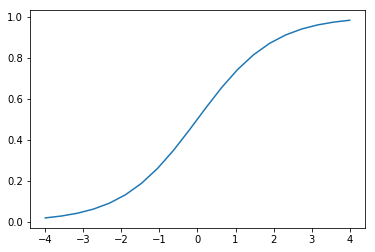

In [2]:
def feval(t):
    return 1/(1+np.exp(-t))
x = np.linspace(-4, 4, 20)
plt.plot(x,feval(x))

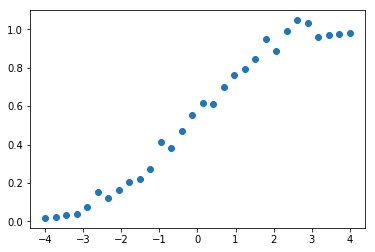

In [3]:
m = 30
x = np.linspace(-4, 4, m)
y = feval(x)
for i in range(m):
    if abs(x[i]) < 3:
        y[i] += 0.15*np.random.rand()
plt.plot(x,y,'o')

## Answer code

In [4]:
def func(n,t,coeffs):
    f = 0*t
    for i in range(n+1):
        f = f + coeffs[i]*t**i    
    return f

In [14]:
n = 5
A = np.array([
    x**i
    for i in range(n+1)
    ]).T

print(la.cond(A))

coeffs,residual,rank,sval=la.lstsq(A,y)
print(coeffs)

709.336633966
[  5.57512211e-01   2.20716407e-01   5.11565066e-04  -8.31352522e-03
  -3.11889434e-04   1.21252966e-04]


In [6]:
coeffNE = la.solve(A.T@A,A.T@y)
print(coeffNE)

[  5.57512211e-01   2.20716407e-01   5.11565066e-04  -8.31352522e-03
  -3.11889434e-04   1.21252966e-04]


In [7]:
#clear
U, sigma, VT = la.svd(A,full_matrices=False)
xsol = VT.T@((U.T@y) / sigma)
print(xsol)

[  5.57512211e-01   2.20716407e-01   5.11565066e-04  -8.31352522e-03
  -3.11889434e-04   1.21252966e-04]


In [8]:
print(sigma)

[ 1988.28802255   533.2329879     32.64285203    12.29325923     2.89355192
     2.80302458]


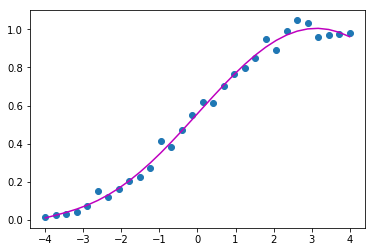

In [9]:
plt.plot(x,y,'o')
plt.plot(x,func(n,x,coeffs),'m')

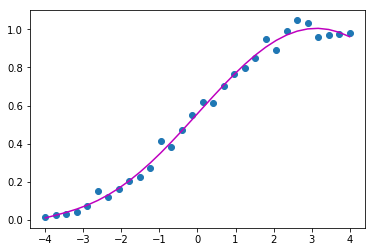

In [10]:
plt.plot(x,y,'o')
plt.plot(x,func(n,x,coeffNE),'m')

In [11]:
for i in range(4,8):
    errorA = (func(n,-i,coeffs) - func(n,-i,coeffNE))
    errorR = errorA/func(n,-i,coeffs)
    print(errorA,errorR)

1.24554533354e-12 1.14369839744e-10
3.91248144993e-12 -5.75903052442e-11
9.88875648034e-12 -3.29932923692e-11
2.15718554131e-11 -2.4031693322e-11


In [12]:
print(func(n,-6,coeffs))

-0.299720208874


In [13]:
print(func(n,-6,coeffNE))

-0.299720208883
